In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
X = df.drop('price', axis=1)
y = df.price

In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(y.values.reshape(y.shape[0],1))

In [5]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
number_of_features = X.shape[1]
w = np.ones(shape=number_of_features)
w

array([1., 1.])

In [8]:
X_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [9]:
np.dot(w, X_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

# <span style="color:red">Batch Gradient Descent</span>

In [10]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):

    number_of_features = X.shape[1]

    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X_scaled.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [11]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

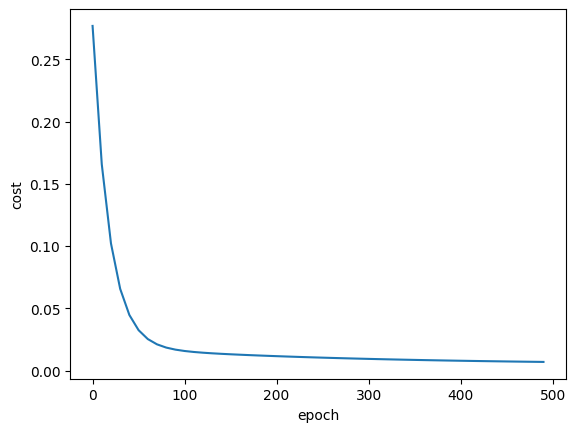

In [12]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [13]:
sx.transform([[1440,3]])

array([[0.22068966, 0.5       ]])

In [14]:
sy.inverse_transform([[1, 0]])

array([[167.,  32.]])

In [15]:
def predict(area, bedrooms, w,  b):
    X_scaled = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0] * X_scaled[0] + w[1] * X_scaled[1] + b
    price = sy.inverse_transform([[scaled_price]])[0][0]
    return price

In [16]:
predict(1000, 2, w, b)

np.float64(30.253094462442355)

In [17]:
predict(1500, 3, w, b)

np.float64(69.47860785714694)

In [18]:
predict(3200, 4, w, b)

np.float64(148.20556681350035)

# <span style="color:red">Stochastic Gradient Descent</span>

In [23]:
import random
random.randint(0, 6)

3

In [32]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):

    number_of_features = X.shape[1]

    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [33]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70653949, 0.67484369]),
 np.float64(-0.2290414215013767),
 np.float64(0.001191840882655849))

In [34]:
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

Text(0, 0.5, 'cost')

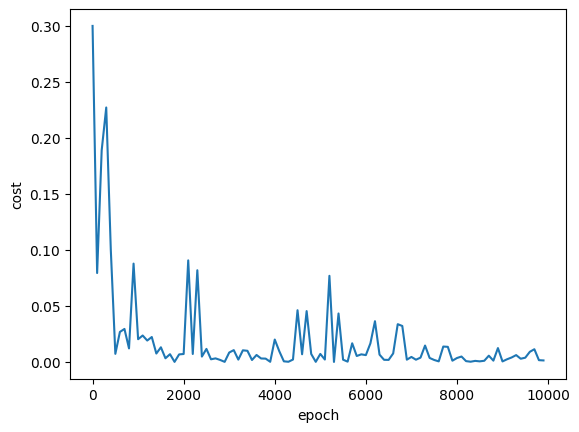

In [37]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel("epoch")
plt.ylabel("cost")

In [38]:
predict(2600, 4, w_sgd, b_sgd)

np.float64(128.61046794663764)

In [41]:
predict(1500, 3, w_sgd, b_sgd)

np.float64(69.65479903374516)

In [42]:
predict(1000, 2, w_sgd, b_sgd)

np.float64(30.433508876594257)

# <span style="color:red">Mini Batch Gradient Descent</span>

In [51]:
np.random.permutation(20)

array([15, 18,  7, 17, 19,  6, 13, 14,  0, 11,  4, 12,  2, 10,  9, 16,  8,
        3,  5,  1], dtype=int32)

In [58]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size=5, learning_rate=0.01):

    number_of_features = X.shape[1]

    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    if batch_size > total_samples: #Here it will become same as Batch Gradient Descent
        batch_size = total_samples

    num_batches = int(total_samples/batch_size)
        
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        batch_size = 32
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j : j+batch_size]
            yj = y_tmp[j : j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/total_samples)*(Xj.T.dot(yj - y_predicted))
            b_grad = -(2/total_samples)*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj - y_predicted))

        if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [76]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500, 5)
w_mbgd, b_mbgd, cost_mbgd

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407422),
 np.float64(0.0068641890429808105))

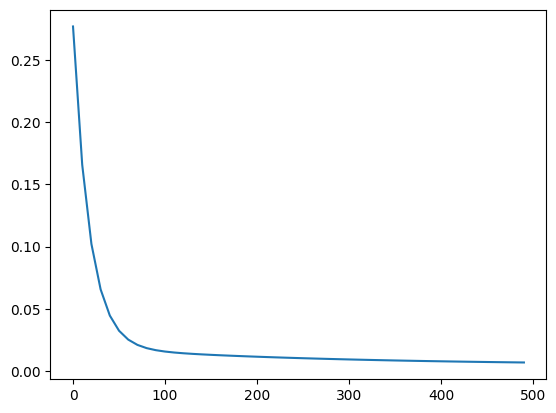

In [77]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [78]:
predict(2600, 4, w_mbgd, b_mbgd)

np.float64(128.45484403267596)

In [79]:
predict(1500, 3, w_mbgd, b_mbgd)

np.float64(69.47860785714694)

In [80]:
predict(1000, 2, w_mbgd, b_mbgd)

np.float64(30.253094462442363)